# Build different model from the feature matrix

## Load feature matrix and churn lable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_all = pd.read_csv('../data/feature_matrix/21feature_0318.csv')
df_all.head(5)

,uid,device,freq_last_30_days_play,mean_last_30_days_play_time,freq_last_14_days_play,mean_last_14_days_play_time,freq_last_7_days_play,mean_last_7_days_play_time,freq_last_3_days_play,mean_last_3_days_play_time,...,freq_last_30_days_download,freq_last_14_days_download,freq_last_7_days_download,freq_last_3_days_download,freq_last_1_days_download,last_play,churn_label,last_search,last_down,active_days
0,12333.0,ip,262.0,217.133588,140.0,221.242857,34.0,197.794118,13.0,192.615385,...,0.0,0.0,0.0,0.0,0.0,1,True,15.0,0.0,16
1,104057.0,ar,215.0,110.800000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,17,True,0.0,0.0,3
2,269510.0,ar,37.0,212.837838,23.0,206.521739,23.0,206.521739,3.0,230.333333,...,21.0,8.0,8.0,0.0,0.0,3,False,4.0,5.0,6
3,1335605.0,ar,1.0,153.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,30,False,29.0,0.0,1
4,1726025.0,ar,384.0,222.036458,135.0,225.125926,65.0,183.400000,25.0,165.640000,...,0.0,0.0,0.0,0.0,0.0,1,True,0.0,0.0,27


In [3]:
# df_label = pd.read_csv('../data/valid_user_id.csv')
# df_label.head(5)

In [4]:
# df_all.set_index('uid',inplace = True)
# df_label.set_index('uid', inplace = True)
# df_all_label = df_all.join(df_label,how = 'left')
df_all_label = df_all
print(df_all.shape)

(6160, 27)


## PCA , train test split, etc..

### one-hot-coding, standardization

In [5]:
# one hot coding for categorical feature
from sklearn.preprocessing import LabelEncoder
df_all_label['ar'] = np.array(df_all_label.device == 'ar')
df_all_label['ip'] = np.array(df_all_label.device == 'ip')
df_all_label['both'] = np.array(df_all_label.device == 'both')
df_all_label = df_all_label.dropna() #.isna().any()
# Standardization
X = df_all_label.drop(['churn_label','device','uid'], axis = 1).as_matrix()
y = df_all_label.churn_label.values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

/Users/jessie/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
pca = PCA(n_components = 'mle', svd_solver = 'full')
#pca = PCA(n_components = 18)
X_scaled_pca = pca.fit_transform(X_scaled)
pd.DataFrame(X_scaled_pca).describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,...,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03,6.160000e+03
mean,5.042251e-15,-2.746653e-16,-8.932339e-16,-4.723314e-16,1.579545e-15,9.213319e-16,-2.551260e-16,-6.358195e-16,2.410364e-16,1.819241e-16,...,9.316817e-18,-1.706562e-16,-2.861167e-18,-1.725712e-17,-5.807944e-18,-1.097382e-17,2.036498e-16,-4.184063e-17,6.125151e-17,9.218816e-18
std,2.653587e+00,1.808804e+00,1.604563e+00,1.425717e+00,1.369728e+00,1.195060e+00,1.032790e+00,1.004698e+00,9.496335e-01,9.121615e-01,...,5.549081e-01,5.272578e-01,4.684126e-01,4.358879e-01,4.182145e-01,3.804344e-01,3.753043e-01,3.634800e-01,3.462895e-01,2.437498e-01
min,-3.121956e+00,-3.401610e+00,-2.958362e+00,-7.587178e+00,-5.987406e+00,-7.858860e+00,-1.311771e+01,-3.213264e+00,-1.951054e+01,-1.565624e+01,...,-1.381440e+01,-4.346528e+00,-2.756935e+00,-5.537821e+00,-9.876954e+00,-8.937597e+00,-3.086012e+00,-5.007080e+00,-3.911992e+00,-3.880754e+00
25%,-2.234413e+00,-2.560841e-01,-3.702176e-01,-1.299766e+00,-9.089094e-01,-6.925438e-01,-5.404866e-01,-4.541063e-01,-2.459849e-01,-3.057268e-01,...,-1.491568e-02,-2.823386e-01,-1.707021e-01,-1.061171e-01,-5.484350e-02,-2.990217e-02,-1.694073e-01,-9.540323e-02,-1.728998e-01,-6.143963e-02
50%,-6.335374e-01,-1.404176e-01,-3.176549e-02,4.421235e-01,-1.211498e-01,-1.221637e-01,-1.708290e-01,-3.207033e-02,-7.364458e-02,-4.915015e-02,...,1.887766e-03,-5.938256e-02,4.462217e-02,-1.902845e-02,3.278325e-03,5.673003e-03,-1.486756e-02,-6.656014e-03,1.736678e-02,-7.413630e-03
75%,1.400508e+00,-7.481691e-02,2.050022e-01,1.012801e+00,6.000188e-01,7.954747e-01,1.627808e-01,1.191875e-01,2.446380e-02,1.564349e-01,...,3.557268e-02,2.582232e-01,2.062263e-01,1.121650e-01,5.451480e-02,4.021845e-02,2.012152e-01,9.677042e-02,1.383696e-01,5.342798e-02
max,2.133152e+01,8.565466e+01,4.540118e+01,2.039541e+01,2.020063e+01,1.304524e+01,2.062771e+01,8.040665e+00,2.688536e+01,2.751004e+01,...,1.864365e+01,6.839092e+00,9.722834e+00,7.717899e+00,9.974827e+00,1.247598e+01,5.917018e+00,5.768227e+00,4.805934e+00,3.903921e+00


In [7]:
pd.DataFrame(encoded_Y).describe()

,0
count,6160.000000
mean,0.615422
std,0.486535
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, encoded_Y, random_state=666, train_size=0.75)

/Users/jessie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Model definition and training with cross validation

## Neural Network (MLP)

In [16]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from keras.callbacks import EarlyStopping


# baseline model
def create_baseline(n_features):
    # create model
    model = Sequential()
    model.add(Dense(n_features, input_dim=n_features, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 42
np.random.seed(seed)
estimator = KerasClassifier(build_fn=create_baseline(X_scaled.shape[1]), epochs=10, batch_size=20, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_scaled, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

TypeError: can't pickle _thread.lock objects

In [ ]:
score

In [20]:
def fit_and_roc(name,x_train, y_train, x_valid, y_valid):
    # fit model
    if name == "ann":
        n_features = x_train.shape[1]
        model = create_baseline(n_features)
        callback = EarlyStopping("val_loss", patience=1, verbose=0, mode='auto')
        model.fit(
                X_train, y_train,
                nb_epoch=10, batch_size=20,
                validation_data=(X_valid, y_valid),
                callbacks=[callback], verbose = 0)
    elif name == 'svm':
        model = svm.SVC(probability=True)
        model.fit(x_train, y_train)
    elif name == 'rf':
        model = RandomForestRegressor(n_jobs=2, n_estimators=150)
        model.fit(x_train, y_train)
    
    # evaluate training error
    y_train_pred = model.predict(x_train)
    y_train_prob = model.predict_proba(x_train)[:, 0]

    fpr, tpr, thresholds = roc_curve(y_train, y_train_prob, pos_label=1)
    if name == 'svm':
        fpr = 1-fpr
        tpr = 1-tpr
    roc_auc = auc(fpr, tpr)
    
    # evaluate testing error
    y_test_pred = model.predict(x_valid)
    y_test_prob = model.predict_proba(x_valid)[:, 0]
    
    fpr_test, tpr_test, threshold_test = roc_curve(y_valid, y_test_prob, pos_label=1)
    if name == 'svm':
        fpr_test = 1-fpr_test
        tpr_test = 1-tpr_test
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # plot roc
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, \
             color='darkorange', lw=2, linestyle='-', label='Training ROC Curve (area = {0:.2f})'.format(roc_auc))
    plt.plot(fpr_test, tpr_test, \
             color='deeppink', lw=2, linestyle='-', label='Testing ROC Curve (area = {0:.2f})'.format(roc_auc_test))
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Logistic Regression')
    plt.legend(loc='lower right')
    plt.show()

    return model

/Users/jessie/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


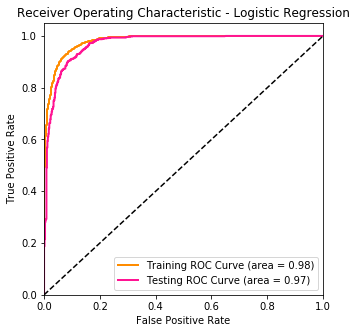

In [11]:
NN_model = fit_and_roc('ann',X_train, y_train, X_valid, y_valid)

## SVM

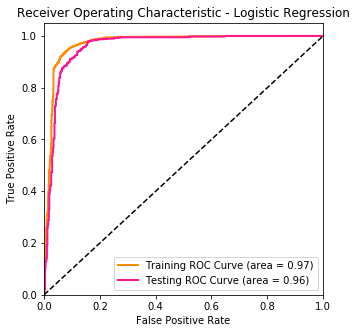

In [12]:
SVM_model = fit_and_roc('svm',X_train, y_train, X_valid, y_valid) 

In [13]:
clf_svm = svm.SVC(probability=True)
results = cross_val_score(clf_svm, X_scaled_pca, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#y_predicted = clf_svm.predict(X_valid)

Results: 92.56% (0.91%)


In [24]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_jobs=2, n_estimators=200)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. feature 3 (0.346864) mean_last_14_days_play_time
2. feature 2 (0.252828) freq_last_14_days_play
3. feature 20 (0.218039) last_play
4. feature 1 (0.038767) mean_last_30_days_play_time
5. feature 0 (0.032425) freq_last_30_days_play
6. feature 10 (0.024363) freq_last_30_days_search
7. feature 23 (0.019515) active_days
8. feature 4 (0.016539) freq_last_7_days_play
9. feature 21 (0.012368) last_search
10. feature 5 (0.007820) mean_last_7_days_play_time
11. feature 11 (0.006183) freq_last_14_days_search
12. feature 6 (0.004669) freq_last_3_days_play
13. feature 7 (0.004071) mean_last_3_days_play_time
14. feature 12 (0.002317) freq_last_7_days_search
15. feature 9 (0.002068) mean_last_1_days_play_time
16. feature 26 (0.002020) both
17. feature 15 (0.001647) freq_last_30_days_download
18. feature 22 (0.001529) last_down
19. feature 24 (0.001494) ar
20. feature 13 (0.001144) freq_last_3_days_search
21. feature 8 (0.001130) freq_last_1_days_play
22. feature 16 (0.000641) freq

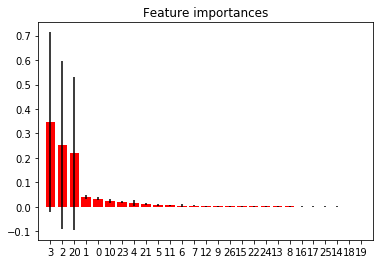

In [17]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]-1):
    print("%d. feature %d (%f)"% (f + 1, indices[f], importances[indices[f]]), 
          df_all_label.drop(['churn_label','device','uid'], axis = 1).columns[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [21]:
fit_and_roc('rf',X_train, y_train, X_valid, y_valid)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [25]:
results = cross_val_score(clf_rf, X_scaled, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 76.96% (3.00%)
